<a href="https://colab.research.google.com/github/LucasMirandaVS/Exerc-cios_Python/blob/main/MiniProjeto_Modelagem_preditiva_com_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando e instalando os pacotes

In [1]:
# Instalando o tensor 
!pip install -q tensorflow==2.5

     |████████████████████████████████| 454.3 MB 14 kB/s 
     |████████████████████████████████| 462 kB 51.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.9 MB/s 
     |████████████████████████████████| 14.8 MB 29.7 MB/s 
     |████████████████████████████████| 132 kB 52.0 MB/s 
     |████████████████████████████████| 4.0 MB 38.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

Os dados utilizados são dados de preços de casas de Boston, disponibilizado no repositório do UCI. Algumas das principais características são:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49152/49082 [==============================] - 0s 1us/step


In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# Split dos dados, a divisãi será 80/20
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

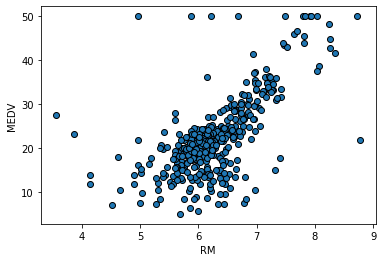

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [13]:
# Quero separar X e Y
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [15]:
# Cria o modelo 
modelo = modelo_linear()

### Treinamento do Modelo

In [17]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))
#Checkpoint salvo a cada 81000 amostras

Checkpoint salvo a cada 81000 amostras


In [18]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [19]:
# Lista para as previsões
predictions_list = []

In [20]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [21]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [22]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [23]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

A saída de streaming foi truncada nas últimas 5000 linhas.
2/2 [==============================] - 0s 29ms/step - loss: 303.0240 - mae: 15.2902 - mse: 303.0240 - val_loss: 375.4895 - val_mae: 16.5409 - val_mse: 375.4895
Epoch 100/4000
2/2 [==============================] - 0s 29ms/step - loss: 299.3605 - mae: 15.1770 - mse: 299.3605 - val_loss: 371.5649 - val_mae: 16.4303 - val_mse: 371.5649
Epoch 101/4000
2/2 [==============================] - 0s 25ms/step - loss: 295.7562 - mae: 15.0639 - mse: 295.7562 - val_loss: 367.6724 - val_mae: 16.3199 - val_mse: 367.6724
Epoch 102/4000
2/2 [==============================] - 0s 30ms/step - loss: 292.1812 - mae: 14.9518 - mse: 292.1812 - val_loss: 363.8170 - val_mae: 16.2097 - val_mse: 363.8170
Epoch 103/4000
2/2 [==============================] - 0s 23ms/step - loss: 288.5794 - mae: 14.8393 - mse: 288.5794 - val_loss: 359.9974 - val_mae: 16.0998 - val_mse: 359.9974
Epoch 104/4000
2/2 [==============================] - 0s 23ms/step - loss: 285.13

In [24]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [25]:
# MSE = Means Squared Error
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [26]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [30]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [31]:
df.head()

,MSE em Treino,MSE em Validação
0,880.134338,983.587463
1,871.679199,974.870422
2,863.374146,966.185242
3,855.138672,957.543518
4,846.832947,948.949951


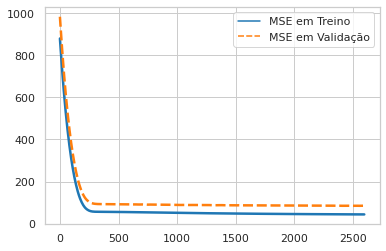

In [32]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [33]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [34]:
# Imprime as previsões
previsoes

array([20.688093, 18.14475 , 23.771505, 21.115126, 20.348982, 20.449461,
       24.399488, 21.724272, 20.85137 , 20.650415, 25.78734 , 23.281675,
       21.071165, 22.559492, 23.10584 , 21.422838, 26.986795, 23.20632 ,
       29.555258, 19.727274, 20.210825, 20.794851, 18.973692, 20.688093,
       18.735056, 23.369596, 22.71021 , 13.918404, 16.920176, 35.577644,
       21.29724 , 17.975195, 19.777514, 22.64113 , 31.746927, 24.198538,
       21.623793, 28.060652, 25.686865, 32.437714, 27.614779, 30.77355 ,
       32.29956 , 16.920176, 22.911165, 23.13096 , 18.107069, 23.413553,
       37.643723, 35.722076, 17.899836, 35.087814, 31.28222 , 25.850142,
       23.507753, 22.64113 , 26.069937, 27.872252, 24.619287, 24.223654,
       23.024202, 18.829256, 23.269117, 22.64741 , 20.89533 , 20.003588,
       21.033487, 21.994303, 21.460516, 21.36632 , 27.04331 , 24.738604,
       10.414242, 13.62953 , 16.832258, 23.20632 , 17.227892, 17.717722,
       23.243998, 21.309801, 20.009867, 25.894098, 